In [10]:
# Cài đặt thư viện cần thiết
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

In [3]:
#1 Nhập dữ liệu đầu vào
with open ('heart.csv') as f:
    df = pd.read_csv(f, sep=",")

In [5]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [8]:
df.rename(columns = {'cp':'chest_pain_type', 
                     'trestbps':'restinng_blood_pressure',
                     'chol':'cholesterol',
                     'fbs':'fasting_blood_sugar',
                     'restecg':'rest_ecg',
                     'thalach':'max_heart_rate_archieved',
                     'exang':'exercíe_include_angina',
                     'oldpeak':'st_depression',
                     'slope':'st_slope',
                     'ca':'num_major_vessels',
                     'thal':'thalassemia'}, inplace=True)

In [9]:
df.head()

,age,sex,chest_pain_type,restinng_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_archieved,exercíe_include_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


<AxesSubplot:>

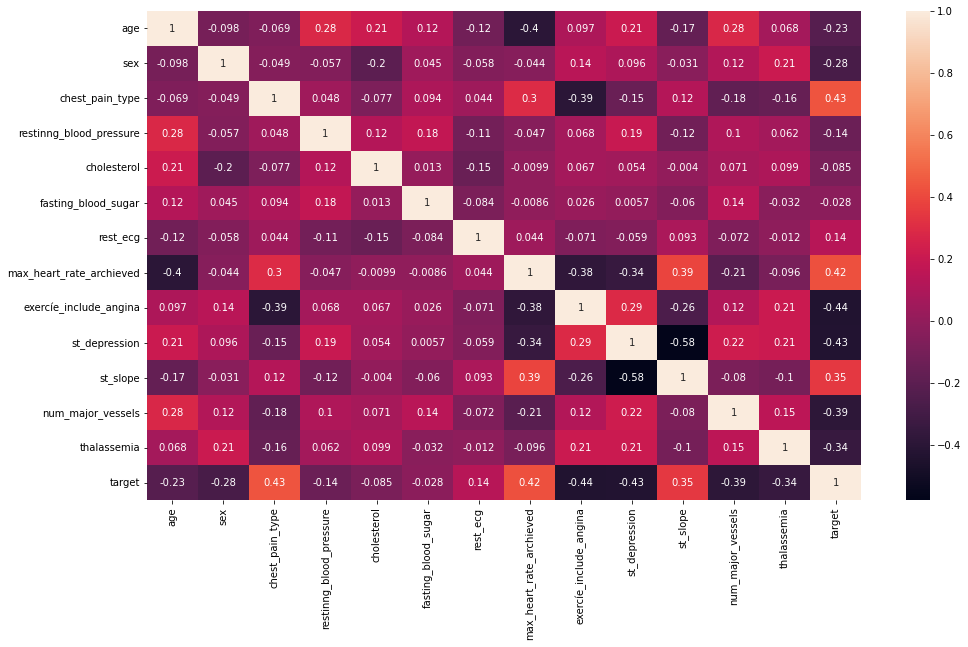

In [11]:
plt.figure(figsize=(16,9))
sns.heatmap(df.corr(method='pearson'), annot=True)

In [12]:
features = df.drop('target', axis=1)
labels = df['target']

In [13]:
features.select_dtypes(exclude=['int64']).columns

Index(['st_depression'], dtype='object')

In [14]:
features_onehot = pd.get_dummies(features, columns=features.select_dtypes(exclude=['int64']).columns)
features_onehot

,age,sex,chest_pain_type,restinng_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_archieved,exercíe_include_angina,st_slope,...,st_depression_3.2,st_depression_3.4,st_depression_3.5,st_depression_3.6,st_depression_3.8,st_depression_4.0,st_depression_4.2,st_depression_4.4,st_depression_5.6,st_depression_6.2
0,63,1,3,145,233,1,0,150,0,0,...,0,0,0,0,0,0,0,0,0,0
1,37,1,2,130,250,0,1,187,0,0,...,0,0,1,0,0,0,0,0,0,0
2,41,0,1,130,204,0,0,172,0,2,...,0,0,0,0,0,0,0,0,0,0
3,56,1,1,120,236,0,1,178,0,2,...,0,0,0,0,0,0,0,0,0,0
4,57,0,0,120,354,0,1,163,1,2,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,1,...,0,0,0,0,0,0,0,0,0,0
299,45,1,3,110,264,0,1,132,0,1,...,0,0,0,0,0,0,0,0,0,0
300,68,1,0,144,193,1,1,141,0,1,...,0,1,0,0,0,0,0,0,0,0
301,57,1,0,130,131,0,1,115,1,1,...,0,0,0,0,0,0,0,0,0,0


In [15]:
X_train = features_onehot[:212]
X_test = features_onehot[212:]
y_train = labels[:212]
y_test = labels[212:]

In [16]:
clf = tree.DecisionTreeClassifier(criterion="entropy", random_state=0)
# Train Decision Tree Classifier
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [17]:
# Predict the response fot test dataset
tree_pred = clf.predict(X_test)
# Model Accuracy, how often is the classifier correct?
tree_score = metrics.accuracy_score(y_test, tree_pred)
print("Accuracy:", tree_score)
print("Report:", metrics.classification_report(y_test, tree_pred))

Accuracy: 0.5824175824175825
Report:               precision    recall  f1-score   support

           0       1.00      0.58      0.74        91
           1       0.00      0.00      0.00         0

    accuracy                           0.58        91
   macro avg       0.50      0.29      0.37        91
weighted avg       1.00      0.58      0.74        91



/Users/trkien/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/trkien/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/trkien/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [18]:
# Tính toán ma trận nhầm lẫn
tree_cm = metrics.confusion_matrix(y_test, tree_pred)

Text(0.5, 1.0, 'Decision Tree Accuracy Score: 0.5824175824175825')

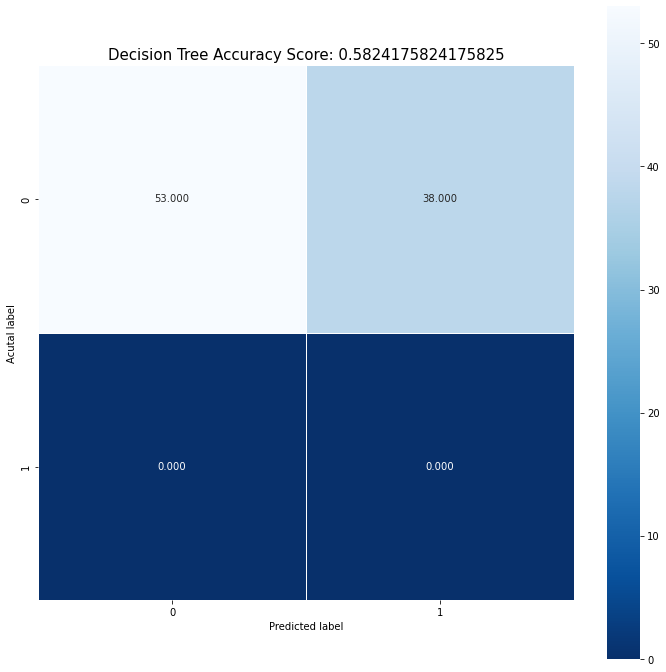

In [19]:
# Biểu diễn lên đồ thị heatmap
plt.figure(figsize=(12,12))
sns.heatmap(tree_cm, annot=True, fmt=".3f", linewidths=.5, square=True, cmap='Blues_r');
plt.ylabel('Acutal label');
plt.xlabel('Predicted label');
title = 'Decision Tree Accuracy Score: {0}'.format(tree_score)
plt.title(title, size=15)

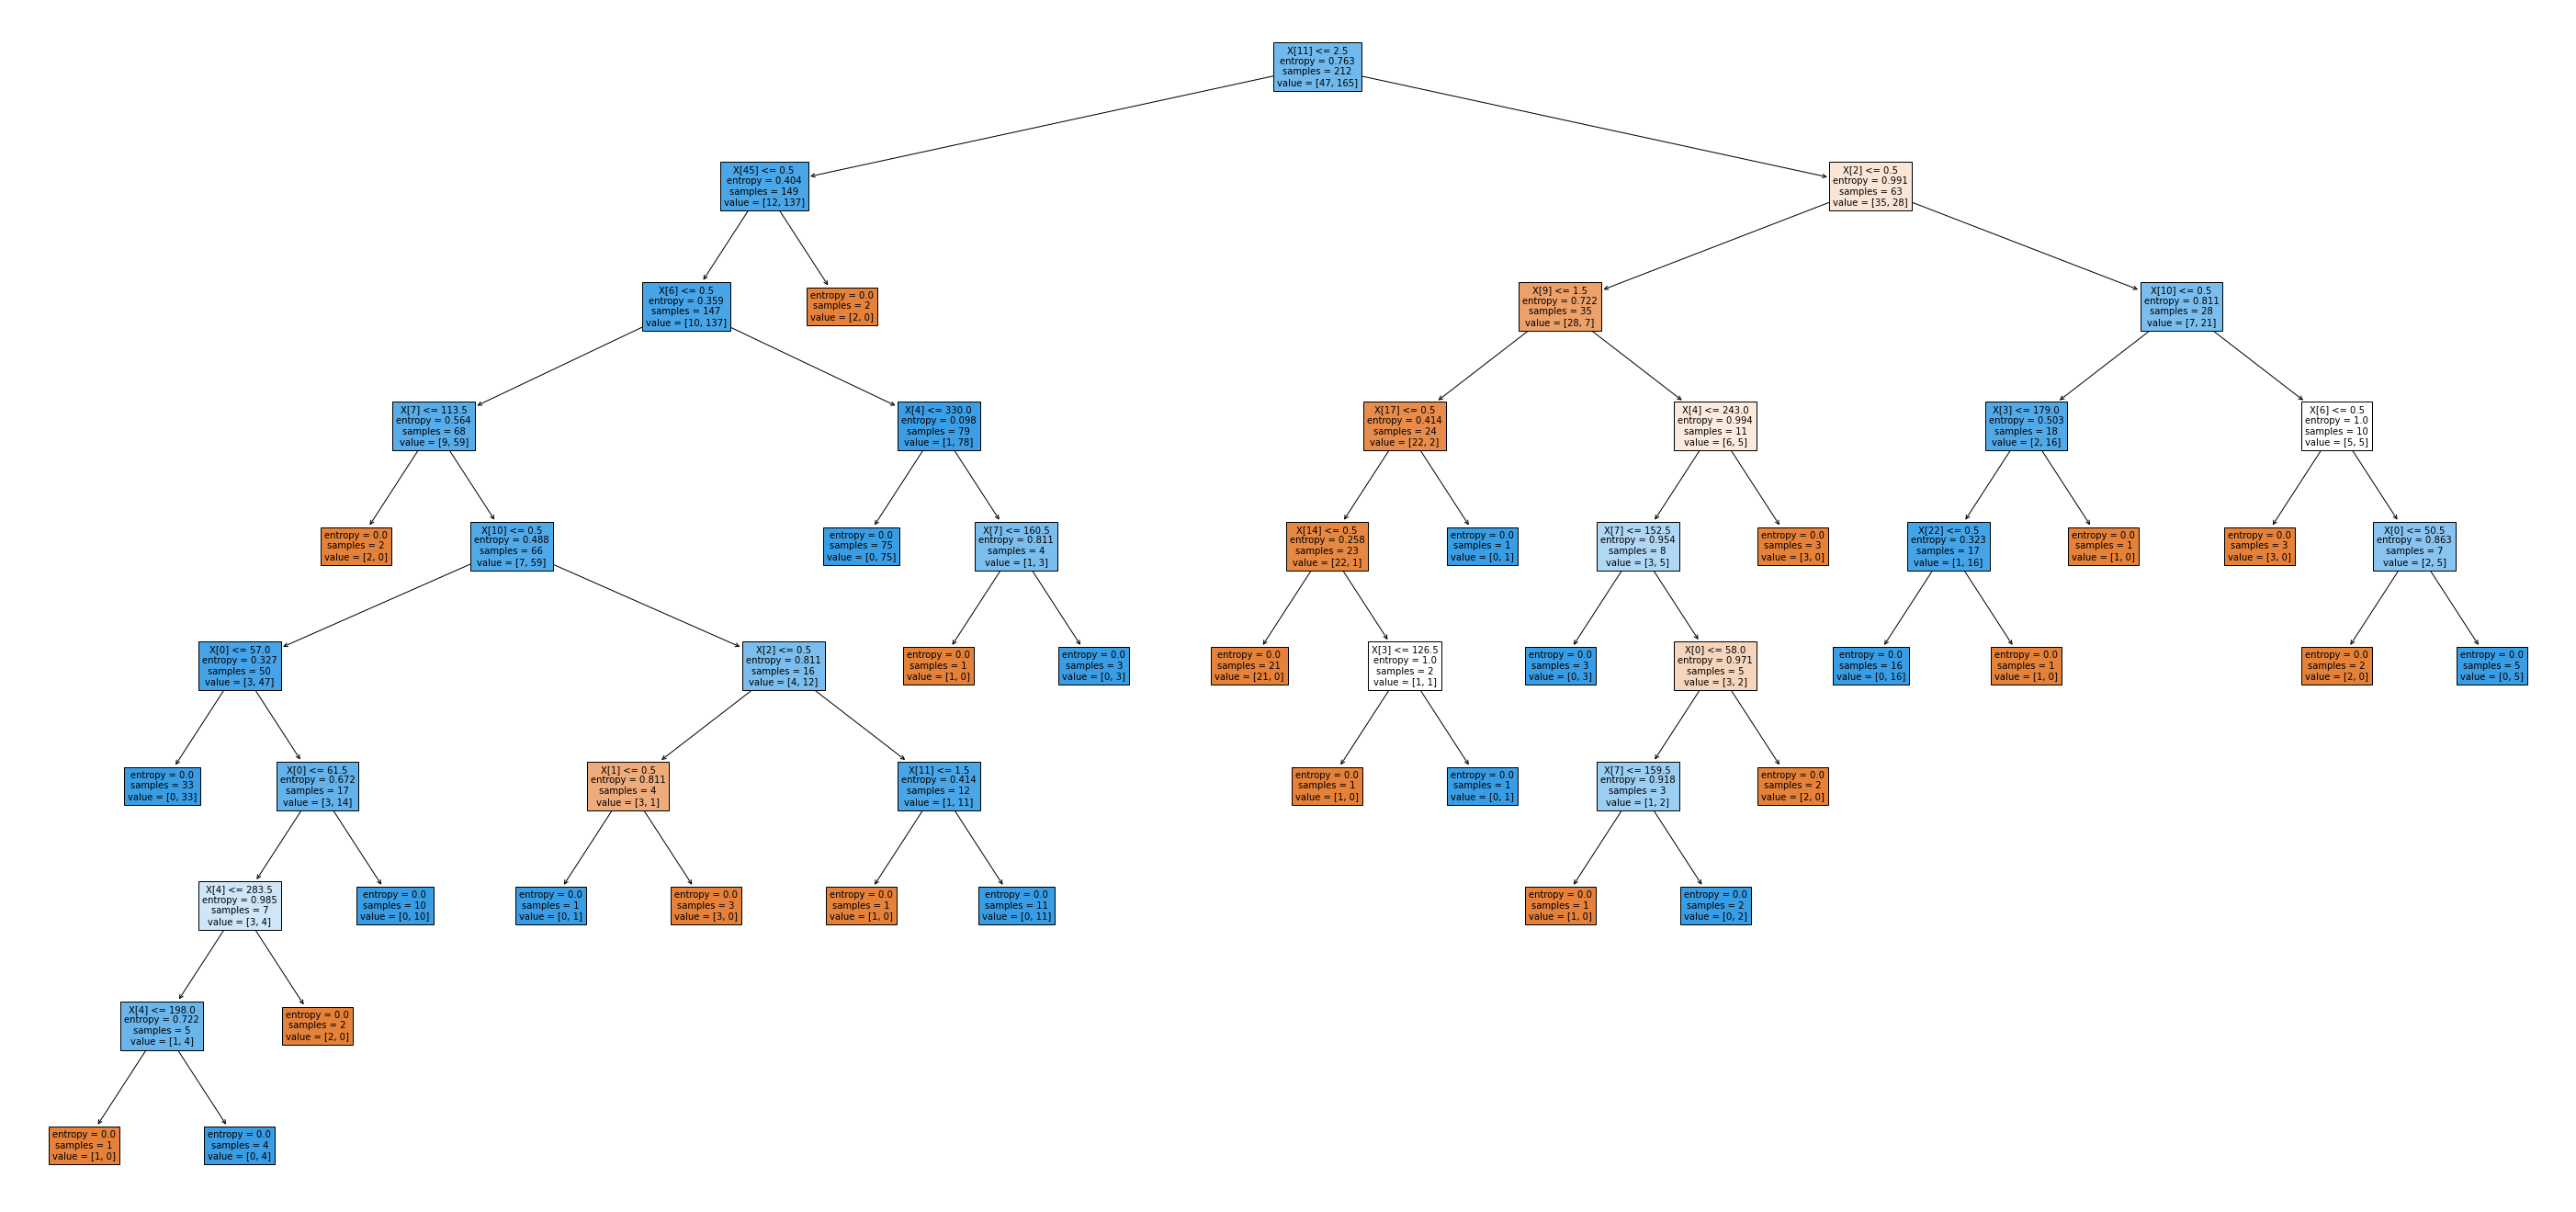

In [20]:
# Cách 2
fig, ax = plt.subplots(figsize=(50, 24))
tree.plot_tree(clf, filled=True, fontsize=10)
plt.savefig('decision_tree', dpi=100)
plt.show()

In [21]:
# criterion='gini'
clf = tree.DecisionTreeClassifier(criterion="gini", random_state=0)
# Train Decision Tree Classifier
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [22]:
# Predict the response fot test dataset
tree_pred = clf.predict(X_test)
# Model Accuracy, how often is the classifier correct?
tree_score = metrics.accuracy_score(y_test, tree_pred)
print("Accuracy:", tree_score)
print("Report:", metrics.classification_report(y_test, tree_pred))

Accuracy: 0.5494505494505495
Report:               precision    recall  f1-score   support

           0       1.00      0.55      0.71        91
           1       0.00      0.00      0.00         0

    accuracy                           0.55        91
   macro avg       0.50      0.27      0.35        91
weighted avg       1.00      0.55      0.71        91



/Users/trkien/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/trkien/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/trkien/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [23]:
# Tính toán ma trận nhầm lẫn
tree_cm = metrics.confusion_matrix(y_test, tree_pred)

Text(0.5, 1.0, 'Decision Tree Accuracy Score: 0.5494505494505495')

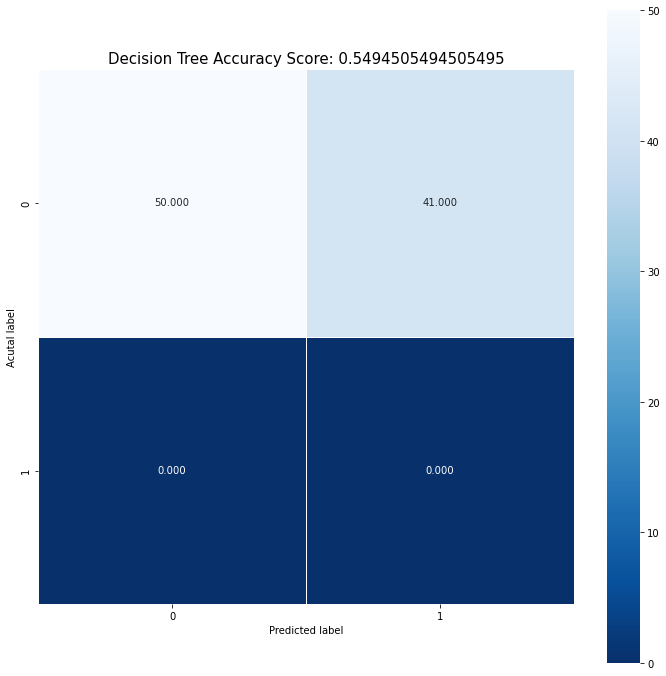

In [24]:
# Biểu diễn lên đồ thị heatmap
plt.figure(figsize=(12,12))
sns.heatmap(tree_cm, annot=True, fmt=".3f", linewidths=.5, square=True, cmap='Blues_r');
plt.ylabel('Acutal label');
plt.xlabel('Predicted label');
title = 'Decision Tree Accuracy Score: {0}'.format(tree_score)
plt.title(title, size=15)

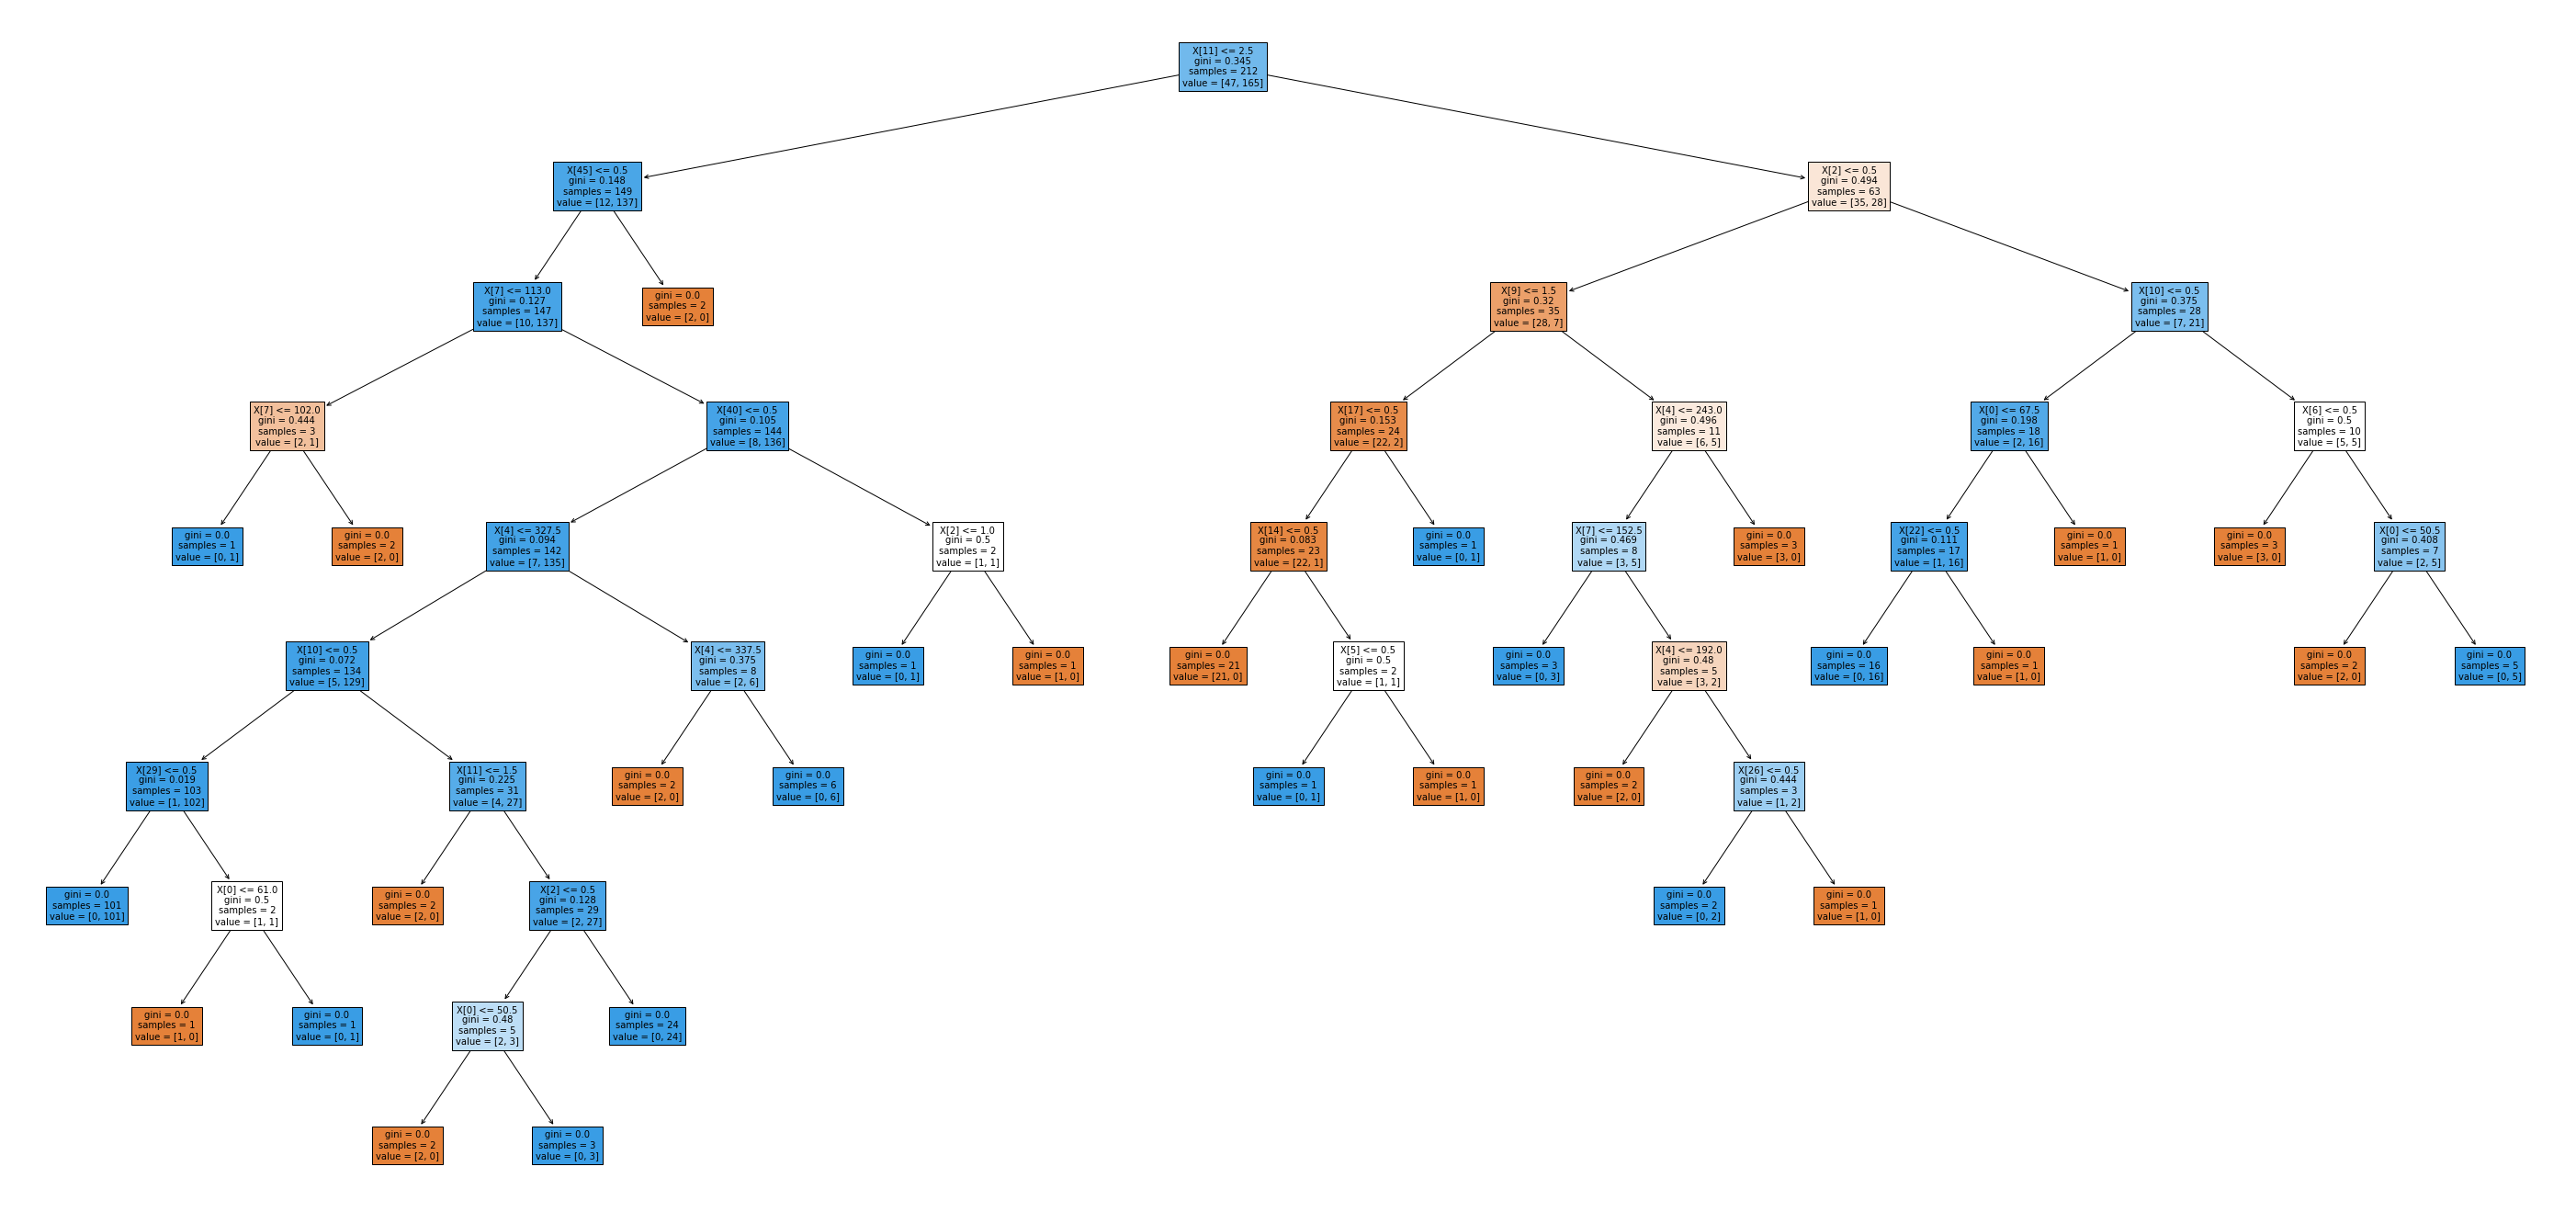

In [25]:
# Cách 2
fig, ax = plt.subplots(figsize=(50, 24))
tree.plot_tree(clf, filled=True, fontsize=10)
plt.savefig('decision_tree', dpi=100)
plt.show()

In [26]:
#9. XÂY DỰNG MÔ HÌNH PHÂN LỚP BẰNG NAIVE BAYES

In [27]:
gnb = GaussianNB()
bayes_pred = gnb.fit(X_train, y_train).predict(X_test)

In [29]:
# Model Accuracy how often is the classifier correct?
bayes_score = metrics.accuracy_score(y_test, bayes_pred)
print("Accuracy:", bayes_score)
print("Report:", metrics.classification_report(y_test, bayes_pred))

Accuracy: 0.7362637362637363
Report:               precision    recall  f1-score   support

           0       1.00      0.74      0.85        91
           1       0.00      0.00      0.00         0

    accuracy                           0.74        91
   macro avg       0.50      0.37      0.42        91
weighted avg       1.00      0.74      0.85        91



/Users/trkien/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/trkien/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/trkien/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(0.5, 1.0, 'Naive Bayes Accuracy Score: 0.7362637362637363')

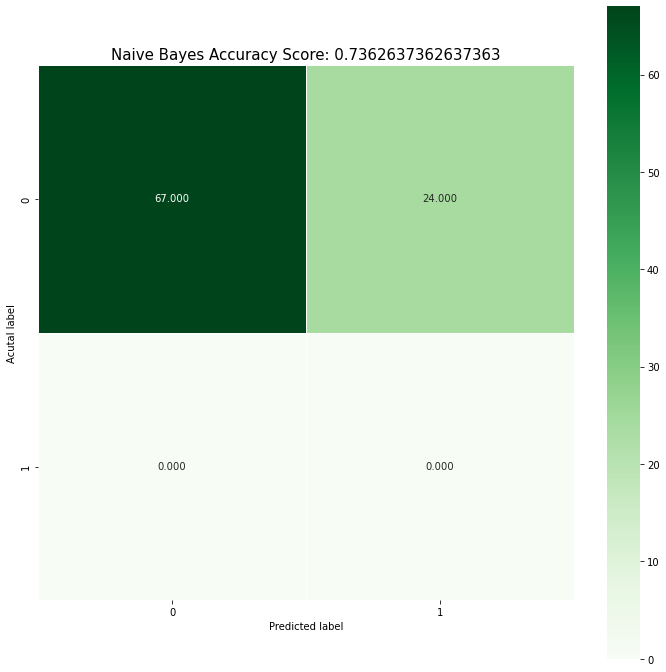

In [30]:
bayes_cm = metrics.confusion_matrix(y_test, bayes_pred)

plt.figure(figsize=(12,12))
sns.heatmap(bayes_cm, annot=True, fmt=".3f", linewidths=.5, square=True, cmap='Greens');
plt.ylabel('Acutal label');
plt.xlabel('Predicted label');
title = 'Naive Bayes Accuracy Score: {0}'.format(bayes_score)
plt.title(title, size=15)